计算 1981 年 1 月至 2019 年 12 月 NINO3 指数的峰度系数和偏度系数

In [1]:
import pandas as pd
import scipy as sp
import scipy.stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# https://ftp.cpc.ncep.noaa.gov/wd52dg/data/indices/sstoi.indices
DATA_PATH = './data/sstoi.indices'

In [3]:
with open(DATA_PATH, 'r+') as f:
    old = f.read()
    if old[: 2] != '  ':
        f.seek(0)
        f.write('  ')
        f.write(old)

In [4]:
df = pd.read_fwf(DATA_PATH)

In [5]:
df

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
0,1982,1,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1,1982,2,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
2,1982,3,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
3,1982,4,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
4,1982,5,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
...,...,...,...,...,...,...,...,...,...,...
473,2021,6,23.12,0.12,26.36,-0.18,28.91,-0.11,27.54,-0.22
474,2021,7,22.20,0.54,25.60,-0.14,28.71,-0.24,27.08,-0.25
475,2021,8,20.85,0.19,24.80,-0.24,28.61,-0.21,26.43,-0.44
476,2021,9,20.45,0.12,24.59,-0.25,28.37,-0.41,26.44,-0.28


In [6]:
# 设定 DatetimeIndex
df.index = df.apply(lambda x: datetime(int(x[0]), int(x[1]), 1), axis=1)
df.drop(['YR', 'MON'], axis=1, inplace=True)

In [7]:
df.index

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01'],
              dtype='datetime64[ns]', length=478, freq=None)

In [8]:
nino3 = df[datetime(1981, 1, 1): datetime(2019, 12, 31)]['NINO3'].to_numpy()

In [9]:
nino3

array([25.87, 26.38, 26.98, 27.68, 27.79, 27.46, 26.44, 26.15, 26.52,
       27.11, 27.62, 28.39, 28.92, 28.92, 29.1 , 29.12, 28.97, 28.15,
       26.62, 25.87, 25.24, 24.61, 24.17, 24.44, 24.82, 26.22, 27.12,
       27.34, 26.46, 25.38, 24.96, 24.5 , 24.35, 23.95, 24.03, 23.7 ,
       24.51, 25.19, 26.11, 26.52, 26.12, 25.6 , 24.74, 24.4 , 24.15,
       24.15, 24.28, 24.29, 24.73, 25.81, 26.84, 27.17, 26.68, 26.3 ,
       25.7 , 25.02, 25.25, 25.62, 25.92, 25.86, 26.69, 27.42, 28.2 ,
       28.49, 28.22, 27.71, 27.07, 26.52, 26.57, 26.2 , 26.13, 26.2 ,
       26.12, 26.55, 27.14, 26.73, 25.22, 24.46, 23.71, 23.37, 23.61,
       23.17, 23.03, 23.07, 24.15, 25.61, 26.02, 26.67, 26.37, 26.08,
       25.28, 24.56, 24.45, 24.49, 24.56, 24.71, 25.34, 26.37, 27.03,
       27.67, 27.35, 26.45, 25.45, 25.06, 24.85, 24.9 , 24.82, 25.08,
       25.65, 26.27, 26.99, 27.32, 27.58, 27.34, 26.57, 25.47, 25.05,
       25.6 , 25.98, 26.52, 27.  , 27.67, 28.33, 28.72, 28.43, 26.66,
       25.53, 24.7 ,

In [10]:
# 偏度系数
sp.stats.skew(nino3)

0.1543925491769251

In [11]:
# 峰峰度系
sp.stats.kurtosis(nino3)

-0.6567643258491644

查看数据符合正态情况

In [12]:
s = pd.DataFrame(nino3, columns=['value'])

<AxesSubplot:>

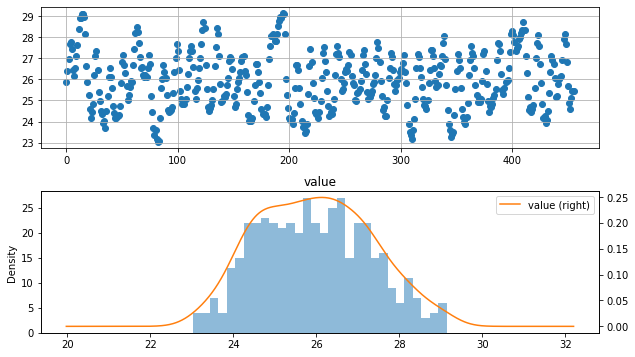

In [15]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(s.index, s.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
s.hist(bins=30, alpha=0.5, ax=ax2)
s.plot(kind='kde', secondary_y=True, ax=ax2)

In [14]:
u = s['value'].mean()  # 计算均值
std = s['value'].std()  # 计算标准差
sp.stats.kstest(s['value'], 'norm', (u, std))

KstestResult(statistic=0.044214674336053694, pvalue=0.3251480886549838)

根据 $K-S$ 检验，$pvalue > 0.05$ 表示 $NINO3$ 符合正态分布，可以进行正态分布的相关